# LAB 3

Author: Sophiya Mehra

Date: 4/28/25

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.integrate import quad
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
import scipy

## Part 1: The Invariant Mass Distribution

In [2]:
# loading data into python
new_data = np.genfromtxt("atlas_z_to_ll.csv",  delimiter = ',', 
                       skip_header=1, usecols=(0,1,2,3,4,5,6,7))

p_tran1 = np.array(new_data[:,0]) # GeV: transverse-momentum for lepton 1
p_tran2 = np.array(new_data[:,1]) # GeV: transverse-momentum for lepton 2
rapidity1 = np.array(new_data[:,2]) # pseduorapidity for lepton 1
rapidity2 = np.array(new_data[:,3]) # pseduorapidity for lepton 2
phi1 = np.array(new_data[:,4]) # rad: angle for lepton 1
phi2 = np.array(new_data[:,5]) # rad: angle for lepton 2
energy1 = np.array(new_data[:,6]) # (GeV)^2: energy for lepton 1
energy2 = np.array(new_data[:,7]) # (GeV)^2: energy for lepton 2

In [3]:
# defining formulas

def invariant_mass(pt1,pt2,phi1, phi2, ada1,ada2,E1,E2):
    px1 = pt1*np.cos(phi1)
    py1 = pt1*np.sin(phi1)
    pz1 = pt1*np.sinh(ada1)

    px2 = pt2*np.cos(phi2)
    py2 = pt2*np.sin(phi2)
    pz2 = pt2*np.sinh(ada2) 
    
    px = px1 + px2
    py = py1 + py2
    pz = pz1 + pz2
    E = E1 + E2

    M = np.sqrt(E**2 - (px**2 + py**2 + pz**2))
    return M

In [4]:
# calculating mass

mass = invariant_mass(p_tran1,p_tran2,phi1,phi2,rapidity1,rapidity2,energy1,energy2)

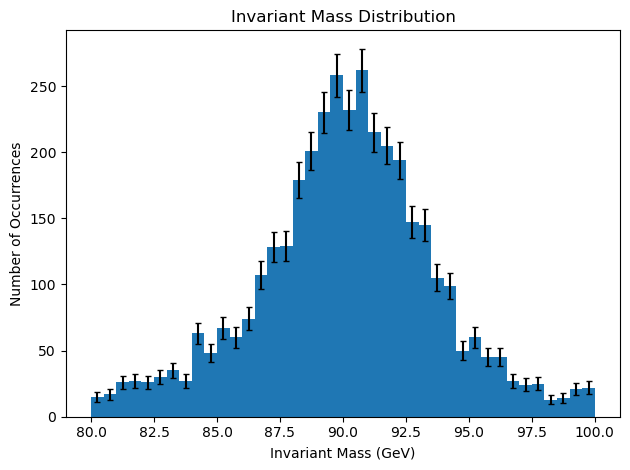

In [5]:
# making histogram

fig, ax = plt.subplots(1,1)
Bins = np.linspace(80,100, 41)
N,bins,patches = ax.hist(mass, bins = Bins);
bincenters = 0.5*(bins[1:]+bins[:-1])
error = np.sqrt(N)
ax.errorbar(bincenters,N,yerr=error,ls='',color = 'black',capsize = 2)
ax.set_xlabel("Invariant Mass (GeV)")
ax.set_ylabel("Number of Occurrences")
ax.set_title("Invariant Mass Distribution")
fig.tight_layout()

## Part 2: Breit-Wigner Fit

In [6]:
# function that returns decay distribution

def D(m,m0,gamma):
    denom = np.pi*((m-m0)**2 + (gamma/2)**2)
    return (5000/2) * (gamma/2) / denom

m0: 90.34080509055941
gamma_fit: 6.390997854900309


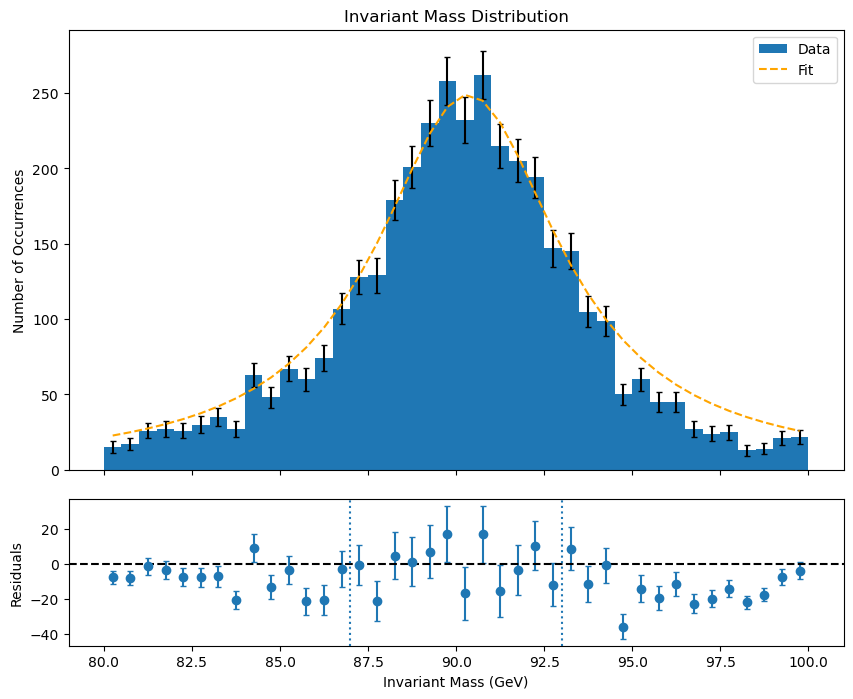

In [7]:
# replotting histogram

fig, (ax, ax_bot) = plt.subplots(2,1,sharex=True, figsize=(10,8), gridspec_kw={'height_ratios':[3,1], 'hspace' : 0.1})
Bins = np.linspace(80,100, 41)
N,bins,patches = ax.hist(mass, bins = Bins,label='Data');
bincenters = 0.5*(bins[1:]+bins[:-1])
error = np.sqrt(N)
ax.errorbar(bincenters,N,yerr=error,ls='',color = 'black',capsize=2)

# plotting bottom axis
ax_bot.set_xlabel("Invariant Mass (GeV)")
ax.set_ylabel("Number of Occurrences")
ax.set_title("Invariant Mass Distribution")

# creating a mask for the fit
mask = (bincenters > 87) & (bincenters < 93)
bins_masked = bincenters[mask]
N_masked = N[mask]
errors_masked = error[mask]

# p0 guesses
m0=90.34
gamma = 6.39

# fitting the curve
params, covar = curve_fit(D,bins_masked,N_masked,sigma=errors_masked,absolute_sigma=True,p0=[m0,gamma])
m0_fit = params[0]
gamma_fit = params[1]
print(f"m0: {m0_fit}")
print(f"gamma_fit: {gamma_fit}")

theory = D(bincenters,params[0],params[1])
residuals = N - theory

ax_bot.errorbar(bincenters,residuals,yerr=error, fmt='o', color = 'C0',capsize=2)
ax_bot.axhline(0,color='black', ls = '--')
ax_bot.set_ylabel('Residuals')
ax_bot.axvline(87,ls='dotted', label='fit region limits')
ax_bot.axvline(93,ls='dotted')


ax.plot(bincenters, theory,'--', label='Fit',color='orange')
ax.legend()

In [8]:
# calculating chisquare, reduced chisq, dof
theory_masked = D(bins_masked,m0_fit,gamma_fit)
chisq = np.sum((N_masked-theory_masked)**2/errors_masked**2)
print(f'chi squared = {chisq}')
dof = len(bins_masked) - 2    # degrees of freedom for fit 
red_chisq = chisq/dof
print(f"reduced chisq = {red_chisq} with dof = {dof}")

chi squared = 9.985097164324262
reduced chisq = 0.9985097164324263 with dof = 10


In [9]:
# calculating pvalue

p_value = scipy.stats.distributions.chi2.sf(chisq, dof)
print(f'pvalue = {p_value}')

pvalue = 0.4418017385574081


In [10]:
# covariance matrix
print(covar)

# the uncertainty in the fit parameters
sigma_m0=np.sqrt(covar[0,0])
sigma_gamma=np.sqrt(covar[1,1])
print(f'error on m0: {sigma_m0}')
print(f'error on gamma: {sigma_gamma}')
print(f'm0= {m0_fit: .1f} +/- {sigma_m0: .1f} GeV')

[[ 8.74479599e-03 -3.38735417e-05]
 [-3.38735417e-05  3.27870604e-02]]
error on m0: 0.09351361391903903
error on gamma: 0.18107197576447157
m0=  90.3 +/-  0.1 GeV


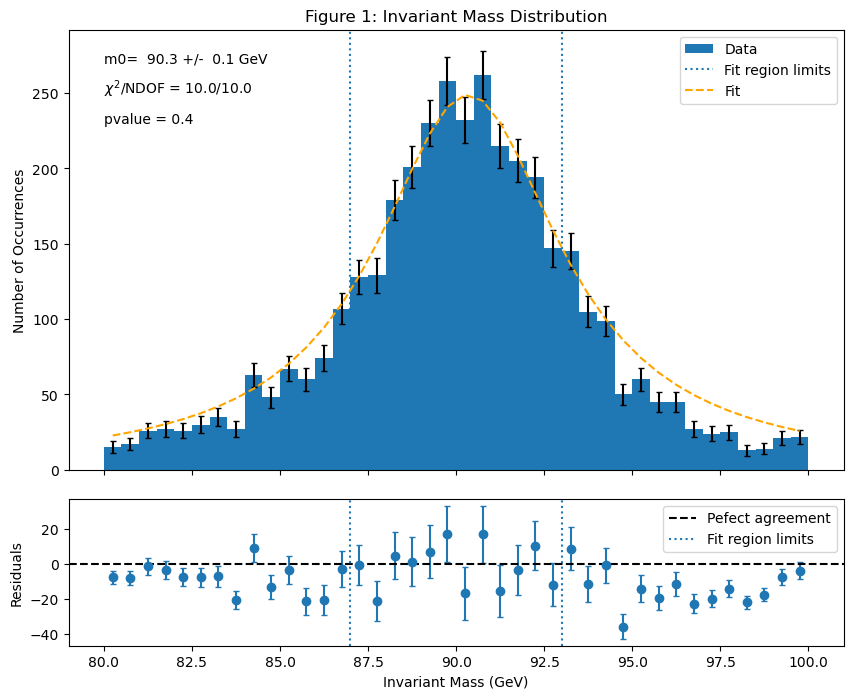

In [11]:
# replotting histogram

fig, (ax, ax_bot) = plt.subplots(2,1,sharex=True, figsize=(10,8), gridspec_kw={'height_ratios':[3,1], 'hspace' : 0.1})
Bins = np.linspace(80,100, 41)
N,bins,patches = ax.hist(mass, bins = Bins,label='Data');
bincenters = 0.5*(bins[1:]+bins[:-1])
error = np.sqrt(N)
ax.errorbar(bincenters,N,yerr=error,ls='',color = 'black',capsize=2)

# residual plot labels
ax_bot.set_xlabel("Invariant Mass (GeV)")
ax.set_ylabel("Number of Occurrences")
ax.set_title("Figure 1: Invariant Mass Distribution")

# plotting theory and residuals over whole range
theory = D(bincenters,params[0],params[1])
residuals = N - theory
ax_bot.errorbar(bincenters,residuals,yerr=error, fmt='o', color = 'C0',capsize=2)
ax_bot.axhline(0,color='black', ls = '--', label='Pefect agreement')
ax_bot.set_ylabel('Residuals')
ax.axvline(87,ls='dotted', label='Fit region limits')
ax.axvline(93,ls='dotted')
ax_bot.axvline(87,ls='dotted', label='Fit region limits')
ax_bot.axvline(93,ls='dotted')
ax.plot(bincenters, theory,'--', label='Fit',color='orange')

# annotating plot
ax.text(80, 270, f'm0= {m0_fit: .1f} +/- {sigma_m0: .1f} GeV')
ax.text(80, 250, r'$\chi^2$/NDOF' f' = {chisq:.1f}/{dof:.1f}')
ax.text(80, 230, f'pvalue = {p_value:.1f}')
ax.legend()
ax_bot.legend()

## Part 3: 2D Parameter Contours

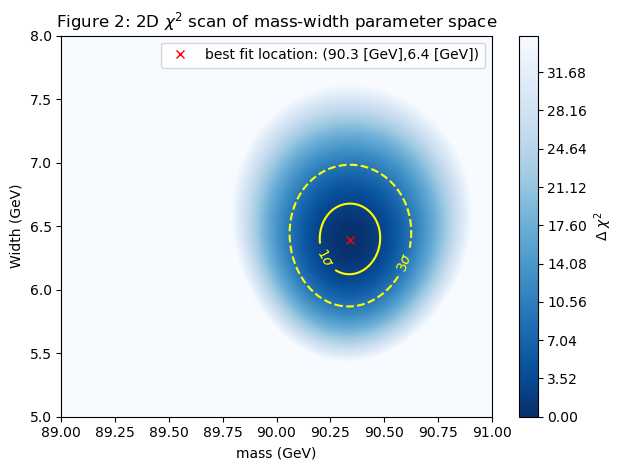

In [12]:
# 2D chi-square scan of mass-width parameter space

n_bins = 300
chi_map = np.zeros((n_bins,n_bins))
mass_scan = np.linspace(89,91,n_bins)
width_scan = np.linspace(5,8,n_bins)

# the double for loop
for i in range(n_bins):
    for j in range(n_bins):
        theory = D(bins_masked, mass_scan[i],width_scan[j])
        chi2 = np.sum((theory-N_masked)**2/errors_masked**2)
        chi_map[j,i] = chi2

chi_min = np.min(chi_map)
chi_map = np.clip(chi_map, chi_min, chi_min+35) # clip to 35
delta_chi_map = chi_map - chi_min

X,Y = np.meshgrid(mass_scan,width_scan)
fig2,ax2 = plt.subplots(1,1)
cs = ax2.contourf(X,Y,delta_chi_map,500,cmap='Blues_r')
cbar=fig2.colorbar(cs,ax=ax2)
cbar.set_label(r'$\Delta$ $\chi^2$')
ax2.set_xlabel('mass (GeV)')
ax2.set_ylabel('Width (GeV)')
ax2.set_title(r'Figure 2: 2D $\chi^2$ scan of mass-width parameter space')

# Define your own labels corresponding to each level
manual_labels = [r'$1\sigma$', r'3$\sigma$']
levels = [2.3,9.21]

# Apply clabel with inline labels
fmt = {level: label for level, label in zip(levels, manual_labels)}

CS = ax2.contour(X,Y,delta_chi_map,levels=levels, colors=['yellow','yellow'],linestyles=['solid','dashed'])
ax2.plot(m0_fit,gamma_fit,'rx',label= 'best fit location: (90.3 [GeV],6.4 [GeV])')
ax2.clabel(CS,fmt=fmt,inline=True)
ax2.legend()
plt.tight_layout()

In [13]:
# calculating diff/sigma diff for the lab report Section IV

mass_real = 91.1880 # GeV
mass_real_unc = 0.0020 # GeV

diff_calc = mass_real - m0_fit # GeV
diff_calc_unc = np.sqrt(mass_real_unc**2 + sigma_m0**2) # GeV

sigma_diff_calc = diff_calc/diff_calc_unc # no units

print(f"difference in mass: {diff_calc} K")
print(f"uncertainty in difference: {diff_calc_unc} K")
print(f"diff/sigma diff of mass: {sigma_diff_calc}")

difference in mass: 0.8471949094405886 K
uncertainty in difference: 0.09353499873415883 K
diff/sigma diff of mass: 9.057517730325198
